In [3]:
#%%% relevent packages & modules
import pandas as pd
import os
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#%%% data preparetion
dta = pd.read_excel('/Users/jialinshang/Desktop/marketing/final project/Oculus_reviews.xlsx').reset_index()

#filter out noise information
dta1 = dta[['index','scrapping_date','one_review_text','review_date','one_review_stars','Rating']].copy()
print(dta1)

#Cleaning the review_text
dta1['one_review_text'] = dta1['one_review_text'].str.replace("n't"," not")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("I'm","I am")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("'ll"," will")

dta1['one_review_text'] = dta1['one_review_text'].str.replace("It's","It is")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("it's","It is")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("that's","that is")

      index          scrapping_date  \
0         0 2021-11-13 09:26:56.988   
1         1 2021-11-13 09:26:57.021   
2         2 2021-11-13 09:26:57.077   
3         3 2021-11-13 09:26:57.108   
4         4 2021-11-13 09:26:57.133   
...     ...                     ...   
5049   5049 2021-11-13 10:11:32.348   
5050   5050 2021-11-13 10:11:32.368   
5051   5051 2021-11-13 10:11:32.388   
5052   5052 2021-11-13 10:11:32.408   
5053   5053 2021-11-13 10:11:32.428   

                                        one_review_text  \
0     WOW!!!  My wife and I are 60, haven't had this...   
1     Let me start with this. If you want to get an ...   
2     I've been exploring worlds and experiencing th...   
3     VR and the Quest 2 is absolutely incredible. I...   
4     I have every oculus headset sold and this one ...   
...                                                 ...   
5049  The Oculus Quest 2 brings affordable quality V...   
5050  Fun but battery sucks. To me forever to downlo...   


5054
Average rating of all reviews: 4.68 / 5
The average length of low-rating reviews is 314 .
Portion of low-rating reviews: 199 / 5054 ( 0.04 )


<ipython-input-5-79a4f2a754d0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['review length'] = negative['one_review_text'].str.len()


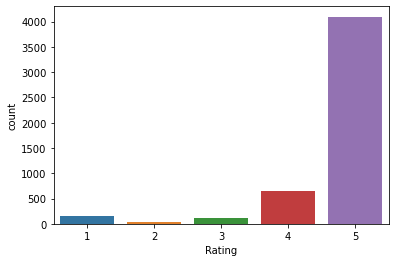

In [5]:
#%%% review distribution
dta1['Rating'].value_counts()
sns.countplot(data=dta1,x='Rating')

neutral = dta1[dta1['Rating']==3]
positive = dta1[dta1['Rating']>=4]
negative = dta1[dta1['Rating']<=2]

total_rated_review = len(neutral)+len(positive)+len(negative)
print(total_rated_review)

#calculate average rating of all reviews
rating_mean = dta1['Rating'].mean()
print("Average rating of all reviews:",round(rating_mean,2),"/",5)

#calculate review length and average length of low-rating reviews
negative['review length'] = negative['one_review_text'].str.len()
low_review_avg =negative['review length'].mean()
print('The average length of low-rating reviews is',round(low_review_avg),".")

#calculate portion of low-rating reviews
print("Portion of low-rating reviews:", 
      len(negative),"/",total_rated_review, "(",round((len(negative)/total_rated_review),2),")")

oculus quest        295
vr headset          246
easy use            221
battery life        149
great product       143
facebook account    139
highly recommend    131
easy set            123
son loves           117
kids love           115
virtual reality     108
fun family          108
head strap          103
best buy             97
vr experience        96
dtype: int64


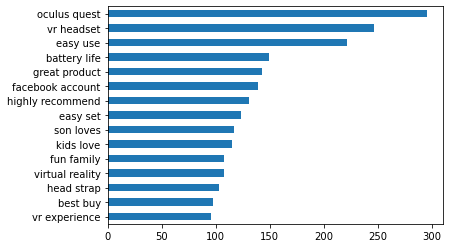

In [5]:
#%%% Analyze Word Frequency
#positive
corpus_positive     = positive.one_review_text.to_list()
vectorizer  = CountVectorizer(lowercase   = True,
                              ngram_range = (2,3),
                              max_df      = 0.9,
                              min_df      = 0.001,
                              stop_words='english');
X           = vectorizer.fit_transform(corpus_positive)
columns=vectorizer.get_feature_names()
df=pd.DataFrame(X.toarray(),columns=columns)
df=df.sum(axis=0)
df = df.sort_values(ascending = False).head(15)
print(df)
df0 = df.sort_values(ascending = True)
fig1=df0.plot.barh(x='freq', width=0.5)

fun easy use               25
screen door effect         24
virtual reality headset    23
easy set use               22
great vr headset           20
need facebook account      20
love oculus quest          20
best vr headset            19
year old son               19
oculus quest great         19
love love love             16
elite strap battery        15
12 year old                15
facebook account use       15
great vr experience        14
dtype: int64


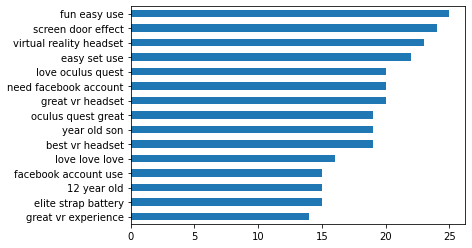

In [6]:
corpus_positive    = positive.one_review_text.to_list()
vectorizer  = CountVectorizer(lowercase   = True,
                              ngram_range = (3,3),
                              max_df      = 0.9,
                              min_df      = 0.001,
                              stop_words='english');
X           = vectorizer.fit_transform(corpus_positive)
columns=vectorizer.get_feature_names()
df2=pd.DataFrame(X.toarray(),columns=columns)
df2=df2.sum(axis=0)
df2 = df2.sort_values(ascending = False).head(15)
print(df2)
df0 = df2.sort_values(ascending = True)
fig1=df0.plot.barh(x='freq', width=0.5)


requires facebook account    6
best buy said                3
review best buy              3
year old son                 3
customer service useless     3
best buy customer            3
active facebook account      3
facebook account use         3
delivered 7th order          2
borrow friend note           2
options sell start           2
tried improved clarity       2
game offers solution         2
option menu worked           2
purchase pair widmovr        2
dtype: int64


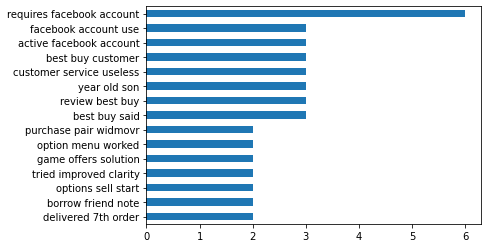

In [7]:
#negative
corpus_negative     = negative.one_review_text.to_list()
vectorizer  = CountVectorizer(lowercase   = True,
                              ngram_range = (3,3),
                              max_df      = 0.9,
                              min_df      = 0.001,
                              stop_words='english');
X           = vectorizer.fit_transform(corpus_negative)
columns=vectorizer.get_feature_names()
df3=pd.DataFrame(X.toarray(),columns=columns)
df3=df3.sum(axis=0)
df3 = df3.sort_values(ascending = False).head(15)
print(df3)
df0 = df3.sort_values(ascending = True)
fig3=df0.plot.barh(x='freq', width=0.5)

oculus quest        317
vr headset          251
easy use            221
facebook account    190
battery life        157
best buy            145
great product       144
highly recommend    131
easy set            123
son loves           118
kids love           116
fun family          109
virtual reality     109
head strap          108
vr experience       100
dtype: int64


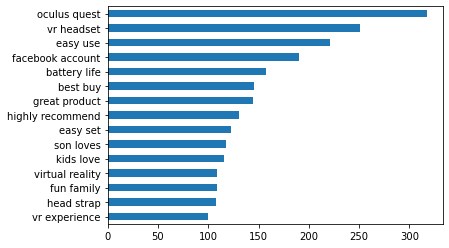

In [8]:
corpus_overall     = dta1.one_review_text.to_list()
vectorizer  = CountVectorizer(lowercase   = True,
                              ngram_range = (2,3),
                              max_df      = 0.9,
                              min_df      = 0.001,
                              stop_words='english');
X           = vectorizer.fit_transform(corpus_overall)
columns=vectorizer.get_feature_names()
df4=pd.DataFrame(X.toarray(),columns=columns)
df4=df4.sum(axis=0)
df4 = df4.sort_values(ascending = False).head(15)
print(df4)
df0 = df4.sort_values(ascending = True)
fig4=df0.plot.barh(x='freq', width=0.5)